# Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import datetime
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# Reading the data

In [12]:
url='https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv'
#Serie = pd.read_csv(url)
Serie = pd.read_csv(url, index_col=0, parse_dates=True, dayfirst=True)

#Setting to display all content
pd.set_option('display.max_rows', len(Serie) + 1)
pd.set_option('display.max_columns', len(Serie.columns) + 1)

In [13]:
LastUpdate = Serie.iloc[-1].name.date()
print("Last update:",LastUpdate)

Last update: 2020-04-01


# Testing to see if the data has been read

In [14]:
Serie.head()

,country,state,city,ibgeID,newCases,totalCases
date,,,,,,
2020-02-25,Brazil,SP,São Paulo/SP,3550308,1,1
2020-02-25,Brazil,TOTAL,TOTAL,0,1,1
2020-02-29,Brazil,SP,São Paulo/SP,3550308,1,2
2020-02-29,Brazil,TOTAL,TOTAL,0,1,2
2020-03-04,Brazil,SP,São Paulo/SP,3550308,1,3


# Organizing the data

In [15]:
#Group by states of Brazil
dfGroup = Serie.groupby(['state'])

#Resample by days
dfDays = dfGroup.resample('D')

#sum all the cases in the day (by State)
dfCasesByDay = dfDays.sum().iloc[:,2]

#unstack the data
dfCasesUnstacked = dfCasesByDay.unstack()

#Transposing the unstacked data
#To put the States in Columns
dfUnstackedT = dfCasesUnstacked.T

#Removing the column TOTAL
dfLessTOTAL = dfUnstackedT.drop('TOTAL',axis=1)

#Change NaN by zeros
df = dfLessTOTAL.fillna(0)

# Plot the data

Text(0.5, 1.0, 'COVID-19 in Brazil')

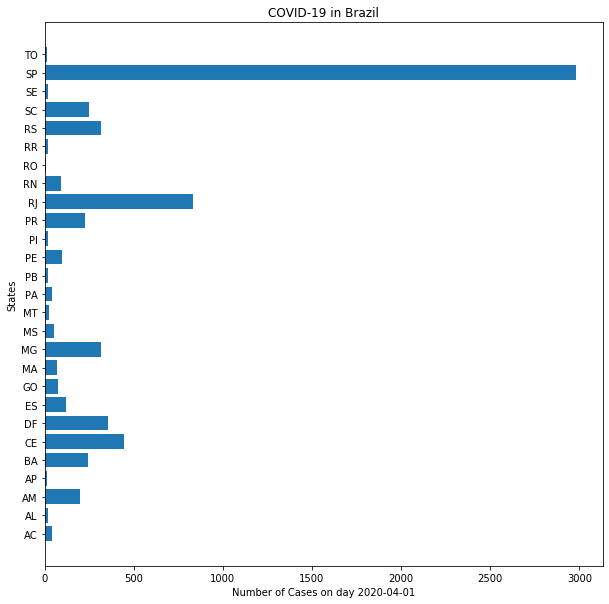

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(df.columns,df.iloc[-1])
ax.set_xlabel('Number of Cases on day %s' %LastUpdate)
ax.set_ylabel('States')
ax.set_title('COVID-19 in Brazil')

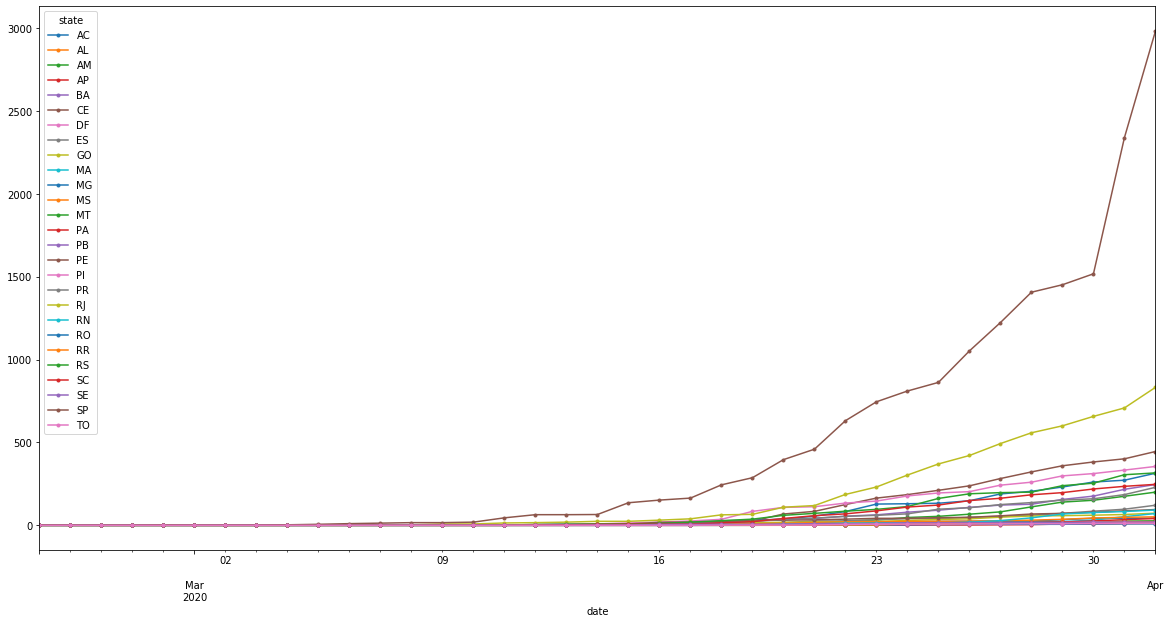

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

df.plot(marker='.',ax=ax)

# 10 states with the highest case

In [18]:
# To use the nlargest it is necessary to transpose the data
df10T = df.T.nlargest(10,LastUpdate)

print('Number of cases on',LastUpdate,':\n',df10T.iloc[:,-1])

Number of cases on 2020-04-01 :
 state
SP    2981.0
RJ     832.0
CE     445.0
DF     355.0
RS     316.0
MG     314.0
SC     247.0
BA     246.0
PR     229.0
AM     200.0
Name: 2020-04-01 00:00:00, dtype: float64


Text(0.5, 1.0, '10 states with highest cases of COVID-19 in Brazil')

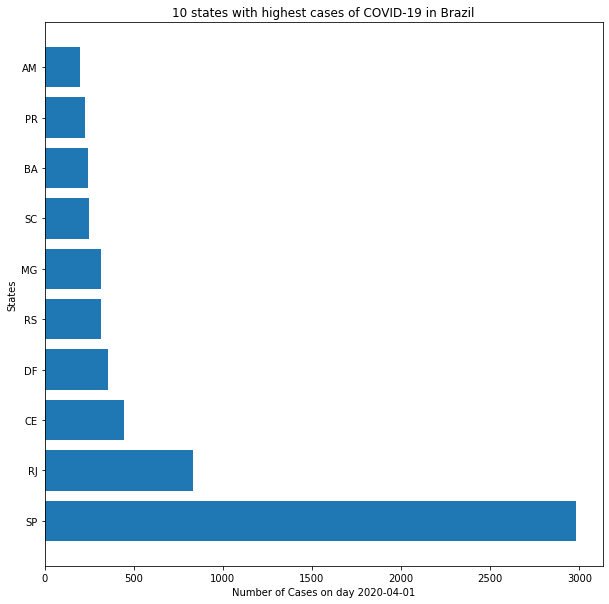

In [23]:
#Trasnposing the data
df10 = df10T.T

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(df10.columns,df10.iloc[-1])
ax.set_xlabel('Number of Cases on day %s' % LastUpdate)
ax.set_ylabel('States')
ax.set_title('10 states with highest cases of COVID-19 in Brazil')

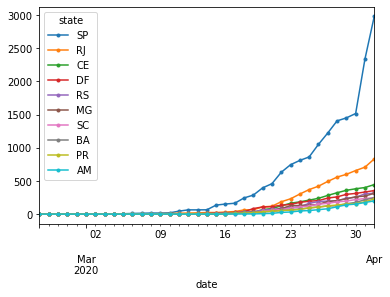

In [20]:
df10.plot(marker='.')